In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Importing all the required libraries
import glob,os
import os, os.path, shutil
import cv2
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, Convolution2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


Importing the data and preprocessing

In [3]:
# Dividing the images into 3 separate folders as per their label
path = '/content/drive/My Drive/DS'
import os, os.path, shutil

folder_path = "/content/drive/My Drive/DS"

images = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

for image in images:
    folder_name = image.split('_')[0]

    new_path = os.path.join(folder_path, folder_name)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

    old_image_path = os.path.join(folder_path, image)
    new_image_path = os.path.join(new_path, image)
    shutil.move(old_image_path, new_image_path)


In [4]:
#Retrieving the images of abdomen and converting it into arrays
path = '/content/drive/My Drive/DS/Abdomen/*.jpeg'
e=[]
f=[]
for file in glob.glob(path):
  #resizing the image size to (32,32)
  img1=cv2.resize(cv2.imread(file),(32,32))
  #normalizing each input image
  e.append(img1/255)
  #creating list of labels
  k= file.split('/')
  k=k[-2]
  f.append(k)

In [5]:
#Retrieving the images of chest and converting it into arrays
path3 = '/content/drive/My Drive/DS/Chest/*.jpeg'
i=[]
j=[]
for file1 in glob.glob(path3):
  #resizing the image size to (32,32)
  img2=cv2.resize(cv2.imread(file1),(32,32))
  #normalizing each input image
  i.append(img2/255)
  #creating list of labels
  l= file1.split('/')
  l=l[-2]
  j.append(l)

In [6]:
#Retrieving the images of head and converting it into arrays
path2 = '/content/drive/My Drive/DS/Head/*.jpeg'
g=[]
h=[]
for file2 in glob.glob(path2):
  #resizing the image size to (32,32)
  img3=cv2.resize(cv2.imread(file2),(32,32))
  #normalizing each input image
  g.append(img3/255)
  #creating list of labels
  o= file2.split('/')
  o=o[-2]
  h.append(o)

In [7]:
#concating all the strings
train= e+i+g
test= f+j+h

In [8]:
len(test)
len(train)

1500

In [9]:
#converting lists into arrays
train1 = np.array(train)
test1 = np.array(test)

In [10]:
print(np.unique(test1))

['Abdomen' 'Chest' 'Head']


In [11]:
#using label binarizer to convert string to array
lb = preprocessing.LabelBinarizer()
test1=lb.fit_transform(test1)

In [12]:
test1

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [13]:
#splitting dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(train1, test1, test_size=0.3,shuffle = True,random_state=42)

In [14]:
print("x train",X_train.shape)
print("y train",Y_train.shape)
print("x test",X_test.shape)
print("y test",Y_test.shape)

x train (1050, 32, 32, 3)
y train (1050, 3)
x test (450, 32, 32, 3)
y test (450, 3)


CNN

In [15]:
#Create a model
model = Sequential()
model.add(Conv2D(64,(2,2), strides=(2,2),  activation='relu', input_shape=(32,32,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))

model.add(Conv2D(128, (2,2), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Conv2D(256, (2,2), activation='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (2,2)))

model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu', name="feature_dense"))
model.add(Dropout(0.6))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0

In [16]:
#compile the model
op = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=op)


In [17]:
hist = model.fit(X_train, Y_train,
              batch_size=32,epochs=10,verbose=2, validation_data = (X_test,Y_test) )

Epoch 1/10
33/33 - 0s - loss: 4.4626 - accuracy: 0.7371 - val_loss: 30.0590 - val_accuracy: 0.3133
Epoch 2/10
33/33 - 0s - loss: 0.2871 - accuracy: 0.9714 - val_loss: 61.1325 - val_accuracy: 0.3133
Epoch 3/10
33/33 - 0s - loss: 0.0782 - accuracy: 0.9876 - val_loss: 63.5389 - val_accuracy: 0.3356
Epoch 4/10
33/33 - 0s - loss: 0.3523 - accuracy: 0.9686 - val_loss: 68.4085 - val_accuracy: 0.3311
Epoch 5/10
33/33 - 0s - loss: 0.2008 - accuracy: 0.9848 - val_loss: 91.8938 - val_accuracy: 0.6111
Epoch 6/10
33/33 - 0s - loss: 0.1722 - accuracy: 0.9857 - val_loss: 149.4826 - val_accuracy: 0.6733
Epoch 7/10
33/33 - 0s - loss: 0.8288 - accuracy: 0.9638 - val_loss: 18.6794 - val_accuracy: 0.7756
Epoch 8/10
33/33 - 0s - loss: 0.5731 - accuracy: 0.9781 - val_loss: 60.7051 - val_accuracy: 0.7556
Epoch 9/10
33/33 - 0s - loss: 0.1967 - accuracy: 0.9914 - val_loss: 461.6149 - val_accuracy: 0.6867
Epoch 10/10
33/33 - 0s - loss: 0.5687 - accuracy: 0.9886 - val_loss: 262.2645 - val_accuracy: 0.6867


In [18]:
#Feature extraction from CNN
new_model=Model(inputs=model.input,outputs=model.get_layer('feature_dense').output)

In [19]:
# Extracting features for train data and test data separately
train_x=new_model.predict(X_train)
test_x=new_model.predict(X_test)

KNN

In [20]:

kNN_values = [3,5,7,9]
accuracy_final = []
filename = 'KNN picklefile'
for k in kNN_values:
  knn=KNeighborsClassifier(n_neighbors= k, p=2)
  knn.fit(train_x,Y_train)
  #save the trained model
  pickle.dump(knn, open('1103258-KNN', 'wb'))

for k in kNN_values:  
  #load the pre-trained model
  loaded_knc = pickle.load(open('1103258-KNN', 'rb'))
  #make prediction
  predict_val = loaded_knc.predict(test_x)
  accuracy = accuracy_score(Y_test,predict_val)
  accuracy_final.append(accuracy)
print("KNN Accuracy")
print(accuracy_final)


KNN Accuracy
[0.9977777777777778, 0.9977777777777778, 0.9977777777777778, 0.9977777777777778]


In [21]:
# Confusion matrix for KNN
confusion_matrix(
    Y_test.argmax(axis=1), predict_val.argmax(axis=1))

array([[147,   1,   0],
       [  0, 141,   0],
       [  0,   0, 161]])

Text(0, 0.5, 'Accuracy')

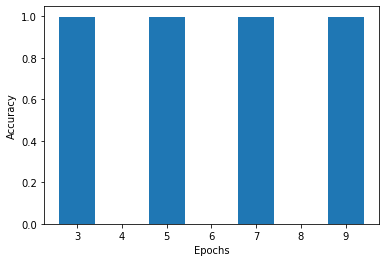

In [22]:
#plotting graph for each k value
fig, CNN = plt.subplots()
CNN.bar(kNN_values, accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



Random Forest

In [23]:
#Hyperparamter tuning using random search
random_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'n_estimators': [130, 180, 230],
               'min_samples_split': [2,5,10]
               }
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, cv=2, n_jobs = -1, scoring="neg_mean_squared_error")

In [24]:
rf_loaded=rf_random.fit(train_x,Y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.0s finished


In [25]:
rf_loaded.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#Save and load pre-trained model
pickle.dump(rf_loaded, open('1103258-RF', 'wb'))
loaded_rf = pickle.load(open('1103258-RF', 'rb'))

In [27]:
# Predict using test data and find accuracy
pred=loaded_rf.predict(test_x)
accuracy_score(Y_test,pred)

1.0

In [28]:
#Confusion matrix for Random forest
confusion_matrix(
    Y_test.argmax(axis=1), pred.argmax(axis=1))

array([[148,   0,   0],
       [  0, 141,   0],
       [  0,   0, 161]])